## Coursera Capstone - Battle of the Neighbourhoods (Week 2)

As part of the final module for the IBM Data Science Professional Certificate, I am tasked with using all skills, technologies and methods learnt throughout the 9 module course, alongside utilising the foursquare API and any relevant accessible data, to experiment with real world problems in the data science world. 

For this week, I will be providing:

- A description of the problem and a discussion of the background. 
- A description of the data and how it will be used to solve the problem.

## 1. Discussion and Background of the Business Problem

BrightMindsDS is a new tech company that specialises in Machine Learning and Big Data. The start up originally began in the CEO's garage in Kent, with 4 employees trying to do everything. Since landing 6 new clients they have had just cause to expand the business and move their office to a more professional location in London, England. The founder of BrightMindsDS requires at least 10 more employees and wants to find a suitable office space to encourage growth, innovation and creativity. 

"Companies that care more about health and welfare of their employees enjoy better engagement, while employees are less often sick, meaning productivity receives a boost. With this in mind, a new report has encouraged employers to think more about how they can make their employees more healthy." (1) 

"Although success can bring happiness, to create great work, the employees’ health, wellbeing and happiness is the most important factor." (2)

With this in mind, the CEO wants to create a nice atmosphere for his new employees. He believes that his employees' health and wellbeing will be a main driver towards the company's success. When looking at possible locations for the new office, things like:

- Can it be accessed via local transport? 
- Are there any gyms nearby?
- Is there a nice park/open space near by?
- Are there good coffee shops nearby for lunch?
- Are there good bars/nightclubs to socialise in after work?


will be considered. A minimum of 2 of these requirements is ideal for a new office location.

In order to obtain an ideal location for the new office space, the London area is explored through clustering and segmentation based on London Post code data and fulfilment of the requirements.

(1) https://www.consultancy.uk/news/18201/companies-that-invest-in-employee-health-enjoy-higher-engagement

(2) https://inside.6q.io/employee-health-wellbeing-matters/

### Target Audience 

Although this project looks at a new Tech company, a variety of companies would be interested in the methods used in this project:

- Any start up or small company might find this useful when looking to expand.
- Any large company that is hoping to open a new office in an unknown location may use this to compare different places. 
- This project is so adaptable that many types of venues, e.g. cafes, restaurants, museums, nightclubs, etc, can use the methods from this project to open in a different location. 

This projects main audience is anyone who is looking to open a new space in a different location to where they are currently situated. 

## 2. Data Preparation 

### Overview
The data for this project will be collected from the Foursquare API and Wikipedia. From wikipedia I can obtain a list of all of the boroughs in London, alongside their postal codes. Using Foursquare I can obtain relevant information about the selected areas.

London synonymous to the Greater London Area, is the capital and largest city of England and of the United Kingdom. It encompasses a total area of 1,583 square kilometres (611 sq mi), an area which had a population of 7,172,036 in 2001 and a population density of 4,542 inhabitants per square kilometre (11,760/sq mi). There are 32 Boroughs in Greater London as well as the 'City of London' principal division. There are 8 Post Code areas; N, NW, SW, SE, W, WC, E and EC. And 121 post code districts. As to be expected this is a very large data set. 

Data can be found here: <https://en.wikipedia.org/wiki/List_of_areas_of_London >

Basic research has led me to focus on East London, i.e. Boroughs with the Post Code starting with E or EC. I have made this decision as this is where the 'East London Tech City' can be found. It is said to be a great location to build your company.

"Some ask why they should set up there. I say the cluster is where your business is most likely to succeed. Your partners clients, investors will be there. You’ll be able to hire people. You’ll come up with great ideas." (3)

Using python libraries and frameworks I will be able to scrape these wiki pages to obtain this relevant data;

- Location
- Borough  
- Post-town
- Post Code
- Dial Code
- Grid reference 
- Average price to buy office space

This data will be filtered to contain only East London locations. 

Using the Geocoder package I can get the Latitude and Longitude for each of these locations. 

The Foursquare API allows application developers to interact with the Foursquare platform. The API itself is a RESTful set of addresses to which you can send requests, so there's really nothing to download onto your server. 
You can currently request output in XML or JSON format. 

Using the Foursquare API I will be able to make specific requests about set locations. I hope to collect a vast amount of data to help fullfil BrightMindsDS requirements and answer their questions. 

Depending on how much data is available will also help determine whether a location is suitable. Again, this will be relevant to the questions; e.g.

The client will want at least 5 coffee shops nearby with a minimum 4 star rating but will only require 1 park/open space to be close to the office. If there are only 2 gyms that shoudn't be a problem compared to if there were only 2 bars in the local area etc. 

Data I hope to obtain:

- Type of venue
- Distance from neighbourhood 
- Ratings 
- Comments 
- Latitude
- Longitude 

Looking at the Foursquare API data, I will hopefully be provided with relevant, personal and reliable data. Using these factors will help to decide where the best location will be to set up the new BrightMindsDS office. 



(3) https://www.mbymontcalm.co.uk/blog/all-you-need-to-know-about-east-london-tech-city/



### Data Cleaning and Feature Selection 

Throughout this notebook, the data will be analysed, broken down and cleaned. Each step I take will be clearly documented and the thought process behind it explained. 


For readability I will download all libraries here first.

!! INCLUDE MORE INFORMATION ABOUT THESE LIBRARIES IN THE REPORT

- beautiful soup
- numpy and pandas, matplotlib
- geopy and geocoder 


In [1]:
# library for BeautifulSoup, for web scrapping
from bs4 import BeautifulSoup

# library to handle data in a vectorized manner
import numpy as np

# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json
print('numpy, pandas, ..., imported...')

!pip -q install geopy
print('geopy installed...')

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')

# library to handle requests
import requests
print('requests imported...')

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
print('json_normalize imported...')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
print('matplotlib imported...')

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Kmeans imported...')

# install the Geocoder
!pip -q install geocoder
import geocoder

# import time
import time

# install and import folium 
!pip -q install folium
print('folium installed...')
import folium # map rendering library
print('folium imported...')

# install and import mpu for distance calculations using lat and long
!pip install mpu --user
import mpu

print('...Done')

numpy, pandas, ..., imported...
geopy installed...
Nominatim imported...
requests imported...
json_normalize imported...
matplotlib imported...
Kmeans imported...
folium installed...
folium imported...
...Done


Use BeautifulSoup library to scrape the wikipedia page for the post codes, neighbourhoods and boroughs. 

In [2]:
# specify which URL/web page we are going to be scraping
website_url = requests.get("https://en.wikipedia.org/wiki/List_of_areas_of_London").text

# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(website_url, 'lxml')

# use the BeautifulSoup function 'prettify' to look a the HTML underlying our chosen web page 
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of areas of London - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XmLPjApAMMAAAkUx814AAAAO","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_areas_of_London","wgTitle":"List of areas of London","wgCurRevisionId":943969323,"wgRevisionId":943969323,"wgArticleId":11915713,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Us

In [3]:
# Use the 'find' function to bring back the table data only using the class id: 'wikitable sortable' (found in code print out above)

My_table = soup.find('table', {'class':'wikitable sortable'})
My_table

<table class="wikitable sortable" style="clear:both;">
<tbody><tr>
<th>Location</th>
<th>London borough</th>
<th>Post town</th>
<th>Postcode district</th>
<th>Dial code</th>
<th>OS grid ref
</th></tr>
<tr>
<td><a href="/wiki/Abbey_Wood" title="Abbey Wood">Abbey Wood</a></td>
<td>Bexley,  Greenwich <sup class="reference" id="cite_ref-mills1_7-0"><a href="#cite_note-mills1-7">[7]</a></sup></td>
<td>LONDON</td>
<td>SE2</td>
<td>020</td>
<td><span class="plainlinks nourlexpansion" style="white-space: nowrap"><a class="external text" href="https://tools.wmflabs.org/geohack/en/51.48648031512;0.10859224316653_region:GB_scale:25000?pagename=List_of_areas_of_London">TQ465785</a></span>
</td></tr>
<tr>
<td><a href="/wiki/Acton,_London" title="Acton, London">Acton</a></td>
<td>Ealing, Hammersmith and Fulham<sup class="reference" id="cite_ref-mills2_8-0"><a href="#cite_note-mills2-8">[8]</a></sup></td>
<td>LONDON</td>
<td>W3, W4</td>
<td>020</td>
<td><span class="plainlinks nourlexpansion" style="

In [4]:
# Loop through data 
A = []
B = []
C = []
D = []
E = []
F = []

for row in My_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==6:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))

London_data = pd.DataFrame(A, columns=['Neighbourhood'])
London_data['Borough'] = B
London_data['Post_town'] = C
London_data['Postcode'] = D
London_data['Dial_code'] = E
London_data['OS_grid_ref'] = F


London_data.head()

,Neighbourhood,Borough,Post_town,Postcode,Dial_code,OS_grid_ref
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon,CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


As can be seen, some locations are associated to two postcodes, e.g. Acton; W3 and W4. The data is **cleaned** by spreading the postcodes to multi-rows and assigning the same values from the other columns. Aside from this, the data collected contained no NULL values or duplicated rows. 

In [5]:
# split locations with more than 1 postcode into multiple rows
clean_df = London_data.drop('Postcode', axis=1).join(London_data['Postcode'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Postcode'))

In [6]:
clean_df.head(10)

,Neighbourhood,Borough,Post_town,Dial_code,OS_grid_ref,Postcode
0,Abbey Wood,"Bexley, Greenwich",LONDON,020,TQ465785,SE2
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W3
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W4
2,Addington,Croydon,CROYDON,020,TQ375645,CR0
3,Addiscombe,Croydon,CROYDON,020,TQ345665,CR0
4,Albany Park,Bexley,"BEXLEY, SIDCUP",020,TQ478728,DA5
4,Albany Park,Bexley,"BEXLEY, SIDCUP",020,TQ478728,DA14
5,Aldborough Hatch,Redbridge,ILFORD,020,TQ455895,IG2
6,Aldgate,City,LONDON,020,TQ334813,EC3
7,Aldwych,Westminster,LONDON,020,TQ307810,WC2


In [7]:
clean_df.shape

(636, 6)

### FEATURE SELECTION prt1 - only select columns required

After data cleaning I was left with 6 columns and 636 rows of data.

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.
Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

Benefits of Feature Selection:

· **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.

· **Improves Accuracy**: Less misleading data means modeling accuracy improves.

· **Reduces Training Time**: fewer data points reduce algorithm complexity and algorithms train faster.

Looking at the data collected from wikipedia, it was clear that not all of it was needed. Phone codes would have no impact on the comapany's choice of location so the *Dial_code* column could be removed. Grid references although helpful when using a map, are not required to obtain the longitude and latitude of the neighbourhoods. That can be done with the relevant libraries and Postcodes. This lead to the *'OS_grid_ref'* column being removed also. 

This left the columns: *Neighbourhood*, *Borough*, *Post_town* and *Postcode*.

In [8]:
# I removed the Dial_code and OS_grid_ref columns as neither were providing any additional information. 
clean_df = clean_df[['Neighbourhood', 'Borough', 'Postcode', 'Post_town']].reset_index(drop=True)
clean_df.head()

,Neighbourhood,Borough,Postcode,Post_town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Addington,Croydon,CR0,CROYDON
4,Addiscombe,Croydon,CR0,CROYDON


### Obtain Coordinates of each location and use folium to visualise the data - DI

To be able to visualise this data, I need the latitude and longitude of each of the locations in my clean London data frame. To do this I will use the Geocoder package. The Geocoder package is used with the *arcgis_geocoder*.

In [9]:
# Geocoder starts here
# Defining a function to use --> get_latlng()'''
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Geocoder ends here

In [10]:
# Test the function with a random postcode 
sample = get_latlng('EC3')
sample 

[51.51200000000006, -0.08057999999994081]

To make sure this has worked correctly, we can reverse geocode this, using the geocodefarm geocoder. It gives the following:

In [11]:
# Reverse using to geocodefarm to test my function
gg = geocoder.geocodefarm(sample, method = 'reverse')
gg

<[OK] Geocodefarm - Reverse [52-54 Fenchurch Street, London, EC3M 3JY, United Kingdom]>

As can be seen, this function has correctly identified the coordinate for that postcode. This means it can be used on my *clean_df* dataframe. For testing purposes or to help clients with large amounts of data, I have added a time parameter to determine how long the function will take to run on my dataset. 

*N.B. Due to the size of this data frame, this will take a while.(around 5mins)* 

In [12]:
start = time.time()

# Extract postcodes 
postal_codes = clean_df['Postcode'] 

# Use latlng function to obtain coordinates and add them to a list called coordinates
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]

end = time.time()
print("Time of execution: ", end - start, "seconds")

Time of execution:  516.974711894989 seconds


In [13]:
# The obtained coordinates (latitude and longitude) are joined with the dataframe as shown
london_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
clean_df['Latitude'] = london_coordinates['Latitude']
clean_df['Longitude'] = london_coordinates['Longitude']
clean_df.head(20)

,Neighbourhood,Borough,Postcode,Post_town,Latitude,Longitude
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON,51.492450,0.121270
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON,51.513240,-0.267460
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON,51.489440,-0.261940
3,Addington,Croydon,CR0,CROYDON,51.384755,-0.051499
4,Addiscombe,Croydon,CR0,CROYDON,51.384755,-0.051499
5,Albany Park,Bexley,DA5,"BEXLEY, SIDCUP",51.506420,-0.127210
6,Albany Park,Bexley,DA14,"BEXLEY, SIDCUP",51.452068,0.172230
7,Aldborough Hatch,Redbridge,IG2,ILFORD,51.506420,-0.127210
8,Aldgate,City,EC3,LONDON,51.512000,-0.080580
9,Aldwych,Westminster,WC2,LONDON,51.516510,-0.119680


Using this data alongside the folium visualisation library,  I can create a map of London with the neighbourhoods superimposed on top. 
This is a helpful visual to show how the data is spread out over the City and see if any observations can be made from it. Clicking on the blue markers reveals the name of each neighbourhood, the respective borough and the Postcode.

I also need the latitude and longitude of London. This is technically the 'starting point' for the map. I can obtain this by using geocoder. 

In [14]:
# To define an instance of the geocoder, we need to define a user_agent
address = 'London, England'

# Use this to obtain the longitude and latitude of London 
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of London are 51.5073219, -0.1276474.


In [15]:
# Create a map of Toronto using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood, borough, postcode in zip(clean_df['Latitude'], clean_df['Longitude'], clean_df['Neighbourhood'], clean_df['Borough'], clean_df['Postcode']):
    label = '{}, {}, {}'.format(neighbourhood, borough, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

This map provides a nice overview of the data. It is interactive which can help determine where neighbourhoods are in relation to each other. However, due to the limitations of the free Foursquare option, I need to decrease the size of my df meaning further **cleaning** is required. . 

In [16]:
# Use .shape to ascertain how big the curret df is
clean_df.shape

(636, 6)

In [17]:
# Count of how many neighbourhoods per postcode 
post_count = clean_df['Postcode'].value_counts()
print(post_count)

print('------------------------------')
# Count of how many unique postcodes there are
print(post_count.shape)

CR0              9
E14              8
NW10             8
N15              7
N1               7
SE9              7
E1               7
SW1              6
N11              6
BR6              6
EC1              6
DA14             5
NW9              5
DA8              5
W1               5
SE1              5
HA3              5
BR3              5
UB7              5
NW2              5
EN3              5
BR1              5
BR5              5
SW8              4
WC2              4
SE4              4
E16              4
HA5              4
SE12             4
NW3              4
SE3              4
TW1              4
N4               4
E9               4
WC1              4
EN5              4
EN4              4
RM3              4
W4               4
SW19             4
NW1              4
SM4              4
BR2              4
NW6              4
E11              4
N20              3
W12              3
DA6              3
KT1              3
CR8              3
E3               3
UB8              3
 N17        

There are 288 unique postcodes and 636 rows of data. This is a great data set but too large for this project. The foursquare API collects data relevant to all neighbourhoods in the dataframe. Obtaining venue information with reagrds to each neighbourhood will be too much information to work with. To reduce the size appropriately without removing any relevant data, I am going to focus on the **East London** postcodes only, as discused above. To do this, the data set needs to be cleaned and filtered again. I have decided to do this by:

- Only keeping data where the Post_town = LONDON 
- Only taking data where the Postcode contains 'E'

In [18]:
# Only select rows where post town is LONDON
london_towns = clean_df[clean_df['Post_town'].str.contains('LONDON')]
london_towns.head()

,Neighbourhood,Borough,Postcode,Post_town,Latitude,Longitude
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON,51.49245,0.12127
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON,51.51324,-0.26746
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON,51.48944,-0.26194
8,Aldgate,City,EC3,LONDON,51.51200,-0.08058
9,Aldwych,Westminster,WC2,LONDON,51.51651,-0.11968


In [19]:
# Only select rows where the Location is in East London - Postcode contains an 'E'

# re-assigns to east_london
EL = london_towns 

# Strips whitespaces before postcode
EL.Postcode = EL.Postcode.str.strip()

# New dataframe for East London postcodes 
east_london = EL[EL['Postcode'].str.contains(('E'))].reset_index(drop=True)

east_london.head(10)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Neighbourhood,Borough,Postcode,Post_town,Latitude,Longitude
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON,51.492450,0.121270
1,Aldgate,City,EC3,LONDON,51.512000,-0.080580
2,Anerley,Bromley,SE20,LONDON,51.410090,-0.056830
3,Angel,Islington,EC1,LONDON,51.523610,-0.098770
4,Arkley,Barnet,EN5,"BARNET, LONDON",51.644415,-0.179185
5,Bankside,Southwark,SE1,LONDON,51.499600,-0.096130
6,Barbican,City,EC1,LONDON,51.523610,-0.098770
7,Barnet Gate,Barnet,EN5,"LONDON, BARNET",51.644415,-0.179185
8,Beckenham,Bromley,SE20,"BECKENHAM, LONDON",51.410090,-0.056830
9,Beckton,Newham,E6,"LONDON, BARKING",51.532920,0.054610


In [20]:
# Determine the size of the new dataframe 
east_london.shape

(156, 6)

156 rows is a much smaller data set to be using, hopefully making visuals clearer and the data easier to understand. All rows now only look at neighbourghs situated in the East of London. Recreating the map with this new data set helps add context to where I am considering for a new office space. 

In [21]:
# Create a map of East London using latitude and longitude values
map_east_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood, borough, postcode in zip(east_london['Latitude'], east_london['Longitude'], east_london['Neighbourhood'], east_london['Borough'], east_london['Postcode']):
    label = '{}, {}, {}'.format(neighbourhood, borough, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_east_london)  
    
map_east_london

## Foursquare 

Now we look at using the Foursquare API. 

Foursquare is a social location service that allows users to explore the world around them. 
The Foursquare API allows application developers to interact with the Foursquare platform. The API itself is a RESTful set of addresses to which you can send requests, so there's really nothing to download onto your server. 

In [22]:
CLIENT_ID = 'ADGKVF32C0BQ4WCU1VBVEGQHWNIYRI2NPR0EOP4LKBKP4KCZ' # your Foursquare ID
CLIENT_SECRET = 'PK14IB5RQETEYWSGU2F5OUFF3XCS1BY2ZZ0ZFMA1OEHO3UNQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ADGKVF32C0BQ4WCU1VBVEGQHWNIYRI2NPR0EOP4LKBKP4KCZ
CLIENT_SECRET:PK14IB5RQETEYWSGU2F5OUFF3XCS1BY2ZZ0ZFMA1OEHO3UNQ


In [23]:
# obtain the nearest 150 venues in each neighbourhood
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    LIMIT = 150
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
# Use the nearby venues function to get all venues for all neighbourhoods within my east_london dataframe
el_venues = getNearbyVenues(names=east_london['Neighbourhood'],
                                   latitudes=east_london['Latitude'],
                                   longitudes=east_london['Longitude']
                                  )

Abbey Wood
Aldgate
Anerley
Angel
Arkley
Bankside
Barbican
Barnet Gate
Beckenham
Beckton
Beckton
Bellingham
Bermondsey
Bethnal Green
Bexleyheath
Blackfriars
Blackheath
Blackheath Royal Standard
Blackheath Royal Standard
Blackwall
Bow
Brixton
Brockley
Bromley
Camberwell
Cambridge Heath
Canary Wharf
Cann Hall
Canning Town
Catford
Charlton
Chinbrook
Chingford
Clerkenwell
Crofton Park
Crossness
Crystal Palace
Crystal Palace
Crystal Palace
Cubitt Town
Custom House
Dalston
Denmark Hill
Deptford
Dulwich
East Dulwich
East Ham
Elephant and Castle
Elephant and Castle
Elephant and Castle
Eltham
Falconwood
Farringdon
Finsbury
Forest Gate
Forest Hill
Gipsy Hill
Gipsy Hill
Greenwich
Grove Park
Hackney
Hackney
Hackney
Hackney Central
Hackney Marshes
Hackney Wick
Haggerston
Herne Hill
Highams Park
Hither Green
Homerton
Honor Oak
Horn Park
Isle of Dogs
Kennington
Kidbrooke
Ladywell
Ladywell
Lambeth
Lea Bridge
Leamouth
Lee
Lewisham
Leyton
Leyton
Leytonstone
Limehouse
Little Ilford
Longlands
Lower Clapton

In [27]:
# Have a brief look at the data collected from Foursquare
el_venues.head(20)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey Wood,51.49245,0.12127,Lesnes Abbey,51.489526,0.125839,Historic Site
1,Abbey Wood,51.49245,0.12127,Lidl,51.496152,0.118417,Supermarket
2,Abbey Wood,51.49245,0.12127,Sainsbury's,51.492824,0.120724,Supermarket
3,Abbey Wood,51.49245,0.12127,Morrisons,51.507276,0.105392,Supermarket
4,Abbey Wood,51.49245,0.12127,Wilko,51.505596,0.103845,Furniture / Home Store
5,Abbey Wood,51.49245,0.12127,Abbey Wood Railway Station (ABW),51.490825,0.123432,Train Station
6,Abbey Wood,51.49245,0.12127,Co-op Food,51.487650,0.113490,Grocery Store
7,Abbey Wood,51.49245,0.12127,KFC,51.505567,0.104557,Fast Food Restaurant
8,Abbey Wood,51.49245,0.12127,Iceland,51.506642,0.105398,Grocery Store
9,Abbey Wood,51.49245,0.12127,Superdrug,51.506883,0.106192,Pharmacy


## Methodology

Here I can start to play around with the data and have a look at what information Foursquare has made available to me. 

I started by breaking the data down by neighbourhoods; looking at how many venues are in each location. This shows which areas of london may have more going on compared to quieter settings with less to do. 

Looking back at the requirements set out by BrightMindsDS I can assess whether they are realistic, e.g. if across all neighbourhoods there are only 2 parks, this requirement may be difficult to fulfil. Fortunately, all venues fitting the criteria listed by the company had a high total count across East London. Creating a bar chat, this made it easier to visualise. 

In [28]:
# Get a count of how many venues there are per neighbourhood
el_venues_count = el_venues.groupby('Neighbourhood').count()
el_venues_count

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Abbey Wood,16,16,16,16,16,16
Aldgate,100,100,100,100,100,100
Anerley,100,100,100,100,100,100
Angel,100,100,100,100,100,100
Arkley,56,56,56,56,56,56
Bankside,100,100,100,100,100,100
Barbican,100,100,100,100,100,100
Barnet Gate,56,56,56,56,56,56
Beckenham,100,100,100,100,100,100


In [29]:
# Get a count of all the unique venue categories in this dataset 
print('There are {} uniques categories.'.format(len(el_venues['Venue Category'].unique())))

There are 283 uniques categories.


In [30]:
# Get a count of each venue category across all neighbourhoods 
el_venues_unique_count = el_venues['Venue Category'].value_counts().to_frame(name='Count')
el_venues_unique_count = pd.DataFrame(el_venues_unique_count).reset_index()
el_venues_unique_count.columns = ['Venue', 'count']
el_venues_unique_count

,Venue,count
0,Pub,1267
1,Coffee Shop,974
2,Café,707
3,Park,532
4,Grocery Store,479
5,Hotel,416
6,Italian Restaurant,329
7,Pizza Place,310
8,Gym / Fitness Center,300
9,Bakery,272


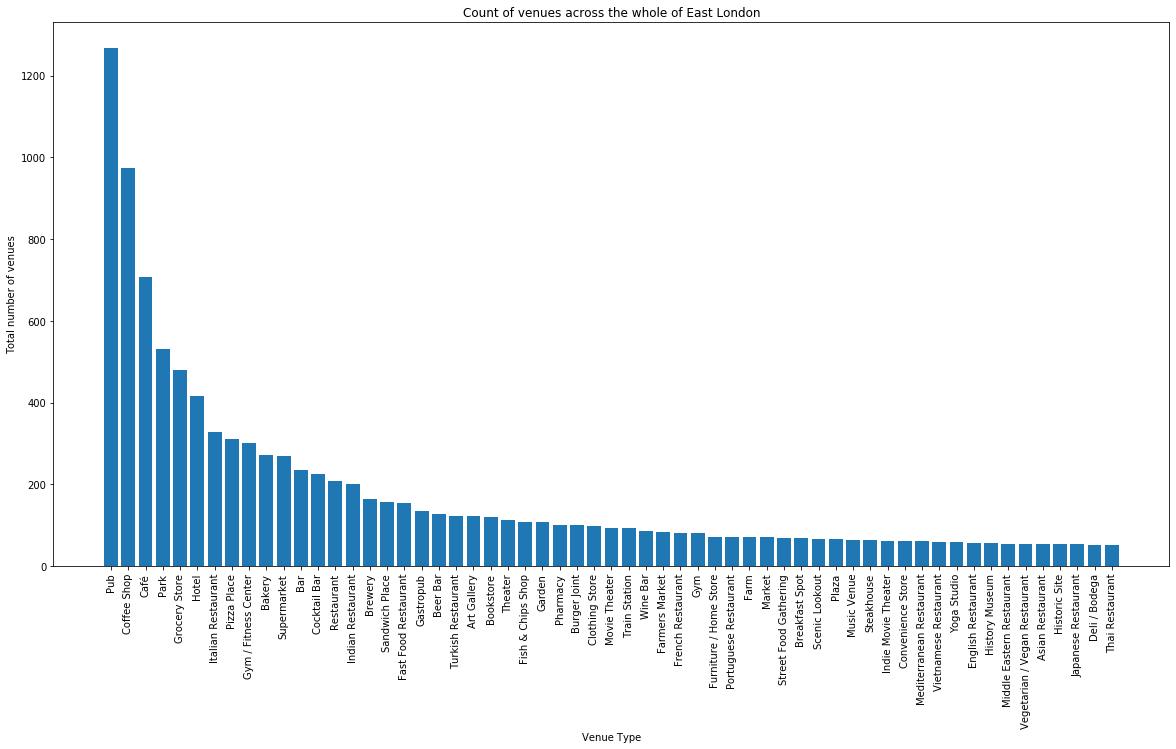

In [31]:
# Graph to show all venue categories that have more than 50 sites in East London
filt_data = pd.DataFrame(el_venues_unique_count[el_venues_unique_count['count']>50])
label = filt_data['Venue']
data = filt_data['count']

# Using the matplotlib.pyplot library to generate a bar chart 

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.figure(figsize = (20,10))
    plt.bar(index, data)
    plt.xlabel('Venue Type', fontsize=10)
    plt.ylabel('Total number of venues', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation = 90)
    plt.title('Count of venues across the whole of East London')
    plt.show()
    

    
plot_bar_x()

These methods offer a lovely breakdown of the collected Foursquare data. There is a wide variety of venues with a great mix of categories. 
From this I can see all varieties of venues that are in BrightMindsDS' criteria have at least 50 individual sites in East London. This means I have a decent amount of data to help determine the best locations available. 

To make sure I have only relevant data to cluster, I am going to section my dataset based on the requirements set by the company:

In [32]:
# Obtain neighbourhoods that have some type of public transport station in them 
EL_stations = el_venues[el_venues['Venue Category']\
                       .str.contains(' Station')].reset_index(drop=True)
EL_stations.index = np.arange(1, len(EL_stations)+1)
print("shape of df with venue category containing stations: ", EL_stations.shape)
EL_stations.head(20)

shape of df with venue category containing stations:  (172, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Abbey Wood,51.492450,0.121270,Abbey Wood Railway Station (ABW),51.490825,0.123432,Train Station
2,Anerley,51.410090,-0.056830,Penge West London Overground Station,51.417587,-0.060976,Train Station
3,Anerley,51.410090,-0.056830,Crystal Palace Railway Station (CYP),51.417811,-0.072037,Train Station
4,Anerley,51.410090,-0.056830,BP,51.413183,-0.068181,Gas Station
5,Anerley,51.410090,-0.056830,BP,51.400804,-0.077238,Gas Station
6,Anerley,51.410090,-0.056830,Anerley Railway Station (ANZ),51.412099,-0.065833,Train Station
7,Arkley,51.644415,-0.179185,New Barnet Railway Station (NBA),51.648007,-0.172295,Train Station
8,Barnet Gate,51.644415,-0.179185,New Barnet Railway Station (NBA),51.648007,-0.172295,Train Station
9,Beckenham,51.410090,-0.056830,Penge West London Overground Station,51.417587,-0.060976,Train Station
10,Beckenham,51.410090,-0.056830,Crystal Palace Railway Station (CYP),51.417811,-0.072037,Train Station


In [33]:
# Obtain neighbourhoods that have some type of coffee shop or cafe nearby 
EL_cafes = el_venues[el_venues['Venue Category']\
                       .str.contains('Coffee')].reset_index(drop=True)
EL_cafes.index = np.arange(1, len(EL_cafes)+1)
print("shape of df with venue category is a coffee shop: ", EL_cafes.shape)
EL_cafes.head(20)

shape of df with venue category is a coffee shop:  (974, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Aldgate,51.51200,-0.08058,The Association,51.513733,-0.079132,Coffee Shop
2,Aldgate,51.51200,-0.08058,Curators Coffee Studio,51.512085,-0.082568,Coffee Shop
3,Aldgate,51.51200,-0.08058,Rosslyn,51.512574,-0.093381,Coffee Shop
4,Aldgate,51.51200,-0.08058,Trade Coffee,51.517430,-0.073814,Coffee Shop
5,Aldgate,51.51200,-0.08058,Exmouth Coffee,51.515919,-0.070309,Coffee Shop
6,Aldgate,51.51200,-0.08058,White Mulberries,51.507206,-0.071129,Coffee Shop
7,Aldgate,51.51200,-0.08058,Roasting Plant Coffee,51.506257,-0.088352,Coffee Shop
8,Aldgate,51.51200,-0.08058,Host,51.512629,-0.093211,Coffee Shop
9,Aldgate,51.51200,-0.08058,Grounded,51.516307,-0.069179,Coffee Shop
10,Aldgate,51.51200,-0.08058,Monmouth Coffee Company,51.505536,-0.091480,Coffee Shop


In [34]:
# Obtain neighbourhoods that have some type of bar or nightclub in them 
EL_bars = el_venues[el_venues['Venue Category']\
                       .str.contains(' Bar')].reset_index(drop=True)
EL_bars.index = np.arange(1, len(EL_bars)+1)
print("shape of df with venue category is a bar/nightclub: ", EL_bars.shape)
EL_bars.head(20)

shape of df with venue category is a bar/nightclub:  (547, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Aldgate,51.51200,-0.08058,BrewDog Tower Hill,51.509948,-0.080977,Beer Bar
2,Aldgate,51.51200,-0.08058,Duck & Waffle,51.516108,-0.080926,Cocktail Bar
3,Aldgate,51.51200,-0.08058,Discount Suit Company,51.516705,-0.075506,Cocktail Bar
4,Aldgate,51.51200,-0.08058,The Merchant House,51.513264,-0.093039,Cocktail Bar
5,Aldgate,51.51200,-0.08058,Nine Lives,51.503343,-0.082054,Cocktail Bar
6,Aldgate,51.51200,-0.08058,Flor,51.505171,-0.089677,Wine Bar
7,Aldgate,51.51200,-0.08058,Black Rock,51.521326,-0.084673,Whisky Bar
8,Aldgate,51.51200,-0.08058,Kill The Cat,51.518658,-0.071516,Beer Bar
9,Aldgate,51.51200,-0.08058,Taylor Taylor,51.520826,-0.074936,Salon / Barbershop
10,Aldgate,51.51200,-0.08058,GŎNG Bar,51.503412,-0.084854,Hotel Bar


In [35]:
# Obtain neighbourhoods that have some type of gym or fitness center in them 
EL_gyms = el_venues[el_venues['Venue Category']\
                       .str.contains('Gym')].reset_index(drop=True)
EL_gyms.index = np.arange(1, len(EL_gyms)+1)
print("shape of df with venue category is a gym: ", EL_gyms.shape)
EL_gyms.head(20)

shape of df with venue category is a gym:  (418, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Abbey Wood,51.492450,0.121270,Better Thamesmere Leisure Centre,51.507287,0.109503,Gym / Fitness Center
2,Aldgate,51.512000,-0.080580,1Rebel,51.515569,-0.080040,Gym / Fitness Center
3,Aldgate,51.512000,-0.080580,Virgin Active,51.514445,-0.085302,Gym / Fitness Center
4,Aldgate,51.512000,-0.080580,1Rebel,51.518378,-0.083861,Boxing Gym
5,Aldgate,51.512000,-0.080580,Urban Fitness,51.512072,-0.068950,Gym / Fitness Center
6,Aldgate,51.512000,-0.080580,Virgin Active,51.520034,-0.082039,Gym / Fitness Center
7,Anerley,51.410090,-0.056830,PureGym,51.427455,-0.056227,Gym / Fitness Center
8,Anerley,51.410090,-0.056830,The Spa at Beckenham,51.408821,-0.037682,Gym / Fitness Center
9,Anerley,51.410090,-0.056830,Better Gym Crystal Palace,51.420830,-0.067629,Gym / Fitness Center
10,Anerley,51.410090,-0.056830,South Norwood Leisure Centre,51.393738,-0.067284,Gym / Fitness Center


In [36]:
# Obtain neighbourhoods that have some type of park or open space locally 
EL_park = el_venues[el_venues['Venue Category']\
                       .str.contains('Park')].reset_index(drop=True)
EL_park.index = np.arange(1, len(EL_park)+1)
print("shape of df where venue category is a park: ", EL_park.shape)
EL_park.head(20)

shape of df where venue category is a park:  (558, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Anerley,51.410090,-0.056830,Crystal Palace Park,51.421673,-0.075321,Park
2,Anerley,51.410090,-0.056830,Croydon Road Recreation Ground,51.403944,-0.033028,Park
3,Anerley,51.410090,-0.056830,Westow Park,51.416649,-0.082999,Park
4,Anerley,51.410090,-0.056830,South Norwood Country Park,51.396442,-0.060146,Park
5,Angel,51.523610,-0.098770,Postman's Park,51.516860,-0.097643,Park
6,Angel,51.523610,-0.098770,Mail Rail,51.524726,-0.113640,Theme Park Ride / Attraction
7,Arkley,51.644415,-0.179185,Oak Hill Park,51.636226,-0.154470,Park
8,Arkley,51.644415,-0.179185,Old Court House Recreation Ground,51.651979,-0.202701,Park
9,Arkley,51.644415,-0.179185,Victoria Recreation Ground,51.652064,-0.165090,Park
10,Bankside,51.499600,-0.096130,West Square Gardens,51.495212,-0.105422,Park


This was another example of **data cleaning**. I realised all data related to venues like museums, stadiums or zoos etc wasn't relevant and could negatively influence the machine learning model. This way I could only look at neighbourhoods that met a least 1 of the requirements. Saving time and resources spent looking at locations that couldn't satisfy the company. 

I sorted the list alphabetically by neighbourhood. Although very simple, doing this helped obtain a clearer picture of what venues can be found in each neighbourhood. I broke this down futher by looking at a count of unique venue categories per Neighbourhood. I visualised this using stacked bar graph. 

In [37]:
# Append all filtered data frames and print out the size to see how much data is available. 

EL_filtered_data = EL_stations.append(EL_cafes)
EL_filtered_data = EL_filtered_data.append(EL_bars)
EL_filtered_data = EL_filtered_data.append(EL_gyms)
EL_filtered_data = EL_filtered_data.append(EL_park)

EL_filtered_data.shape

(2669, 7)

In [38]:
# Use .sort_values to order the dataset by 'Neighbourhood' - this way I can have a clearer view of what is available in each location
EL_filtered_data_sort = EL_filtered_data.sort_values(by='Neighbourhood')
EL_filtered_data_sort.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Abbey Wood,51.49245,0.12127,Abbey Wood Railway Station (ABW),51.490825,0.123432,Train Station
1,Abbey Wood,51.49245,0.12127,Better Thamesmere Leisure Centre,51.507287,0.109503,Gym / Fitness Center
3,Aldgate,51.51200,-0.08058,Rosslyn,51.512574,-0.093381,Coffee Shop
4,Aldgate,51.51200,-0.08058,Trade Coffee,51.517430,-0.073814,Coffee Shop
5,Aldgate,51.51200,-0.08058,Exmouth Coffee,51.515919,-0.070309,Coffee Shop


In [39]:
# Get a count of each type of venue per Neighbourhood
uni_neigh = EL_filtered_data_sort.groupby(['Neighbourhood','Venue Category']).count()
uni_neigh.reset_index()

first_set = EL_filtered_data_sort.head(1313)
last_set = EL_filtered_data_sort.tail(1326)

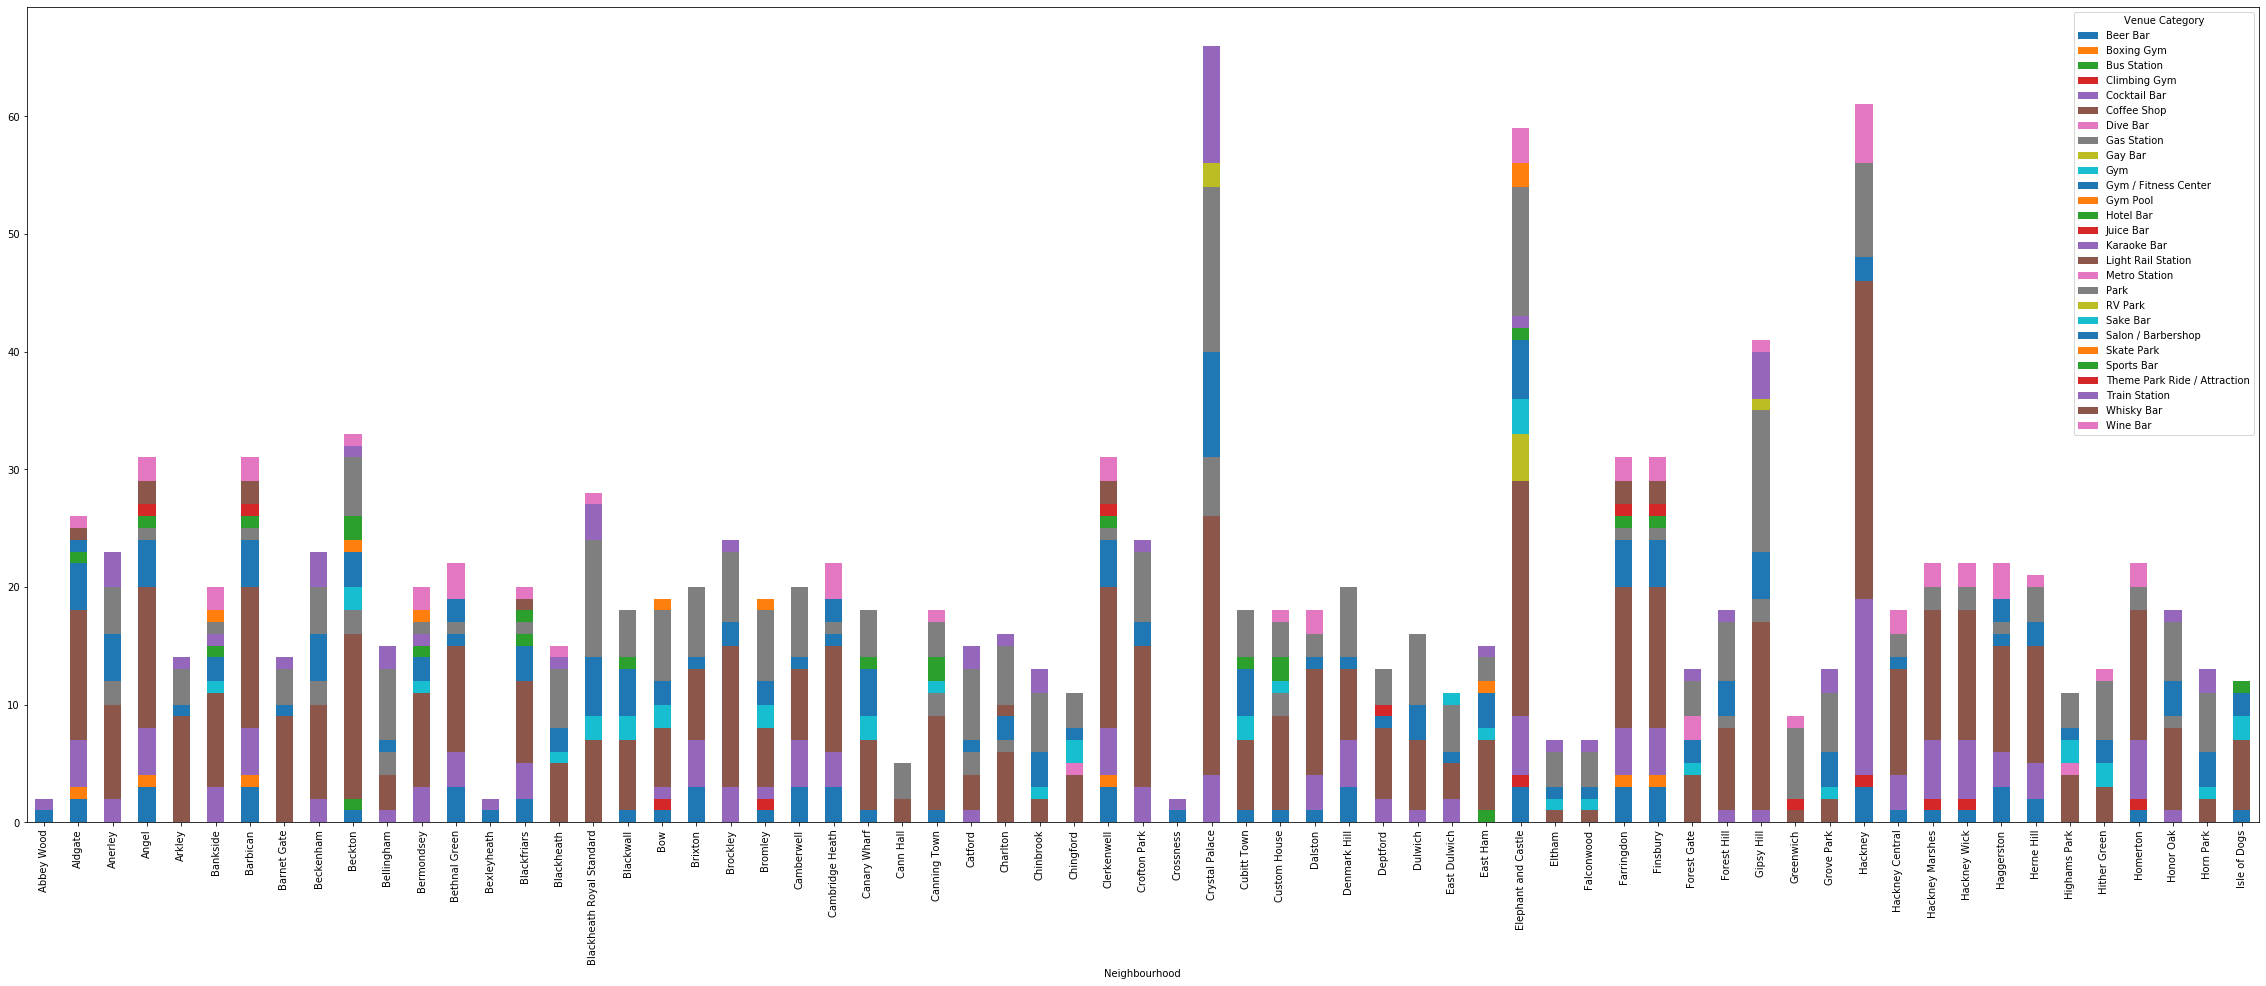

In [40]:
#test = EL_filtered_data_sort.groupby(['Neighbourhood','Venue Category']).size().unstack().plot(kind='bar', stacked=True, figsize = (60,20))
test1 = first_set.groupby(['Neighbourhood','Venue Category']).size().unstack().plot(kind='bar', stacked=True, figsize = (40,15), fontsize = 10)

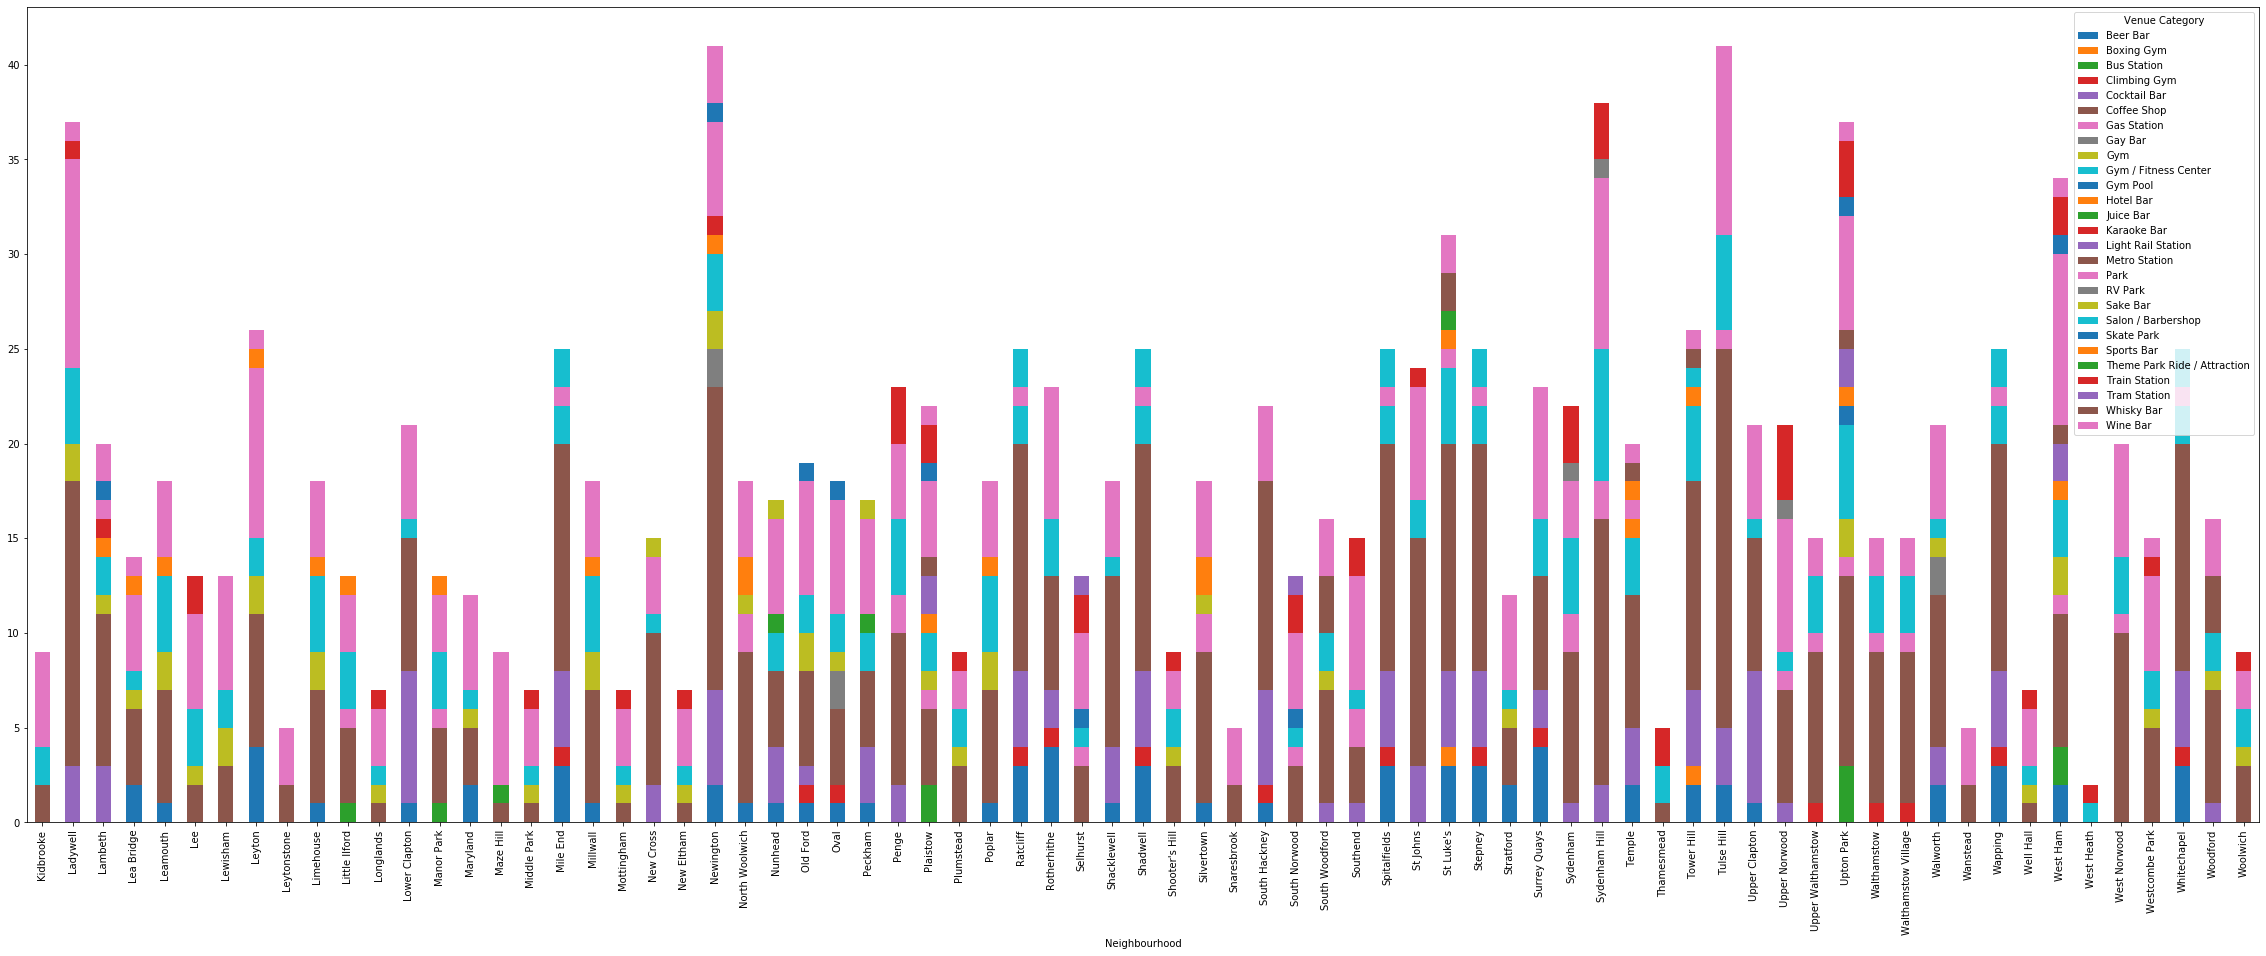

In [41]:
test2 = last_set.groupby(['Neighbourhood','Venue Category']).size().unstack().plot(kind='bar', stacked=True, figsize = (40,15), fontsize = 10)

Stacked bar charts are a great way to visualise trends and outliers. In this occasion, you can see Gay Bars do not appear very often, Elephant and Castle seems to have the largest count. Using the coloured keys it can be a nice way to pick out important information quickly. Due to the wide variety of venues it can be used for multiple purposes too. 

Using the **Haversine function** I was able to calculate the distance between each venue and the respective neighbourhood. 

*The haversine formula is an equation important in navigation, giving great-circle distances between two points on a sphere from their longitudes and latitudes. It is a special case of a more general formula in spherical trigonometry, the law of haversines, relating the sides and angles of spherical "triangles".* https://rosettacode.org/wiki/Haversine_formula

I did this not for the model, but as a good point of reference. If stuck between a choice of locations or unsure if a nightclub would be better than a pub, using distance can make the decision easier for BrightMindsDS. The more information you can give to a client the better the relationship will be. 

In [42]:
# Use the Haversine function to obtain the distance between each venue and the relevant neighbourhood.(The distance will be in KM)

# Extract each column and set as a variable 
Nlat = EL_filtered_data_sort['Neighbourhood Latitude']
Nlon = EL_filtered_data_sort['Neighbourhood Longitude']
Vlat = EL_filtered_data_sort['Venue Latitude']
Vlon = EL_filtered_data_sort['Venue Longitude']


def Haversine(lat1,lon1,lat2,lon2, **kwarg):
    """
    This uses the ‘haversine’ formula to calculate the great-circle distance between two points – that is, 
    the shortest distance over the earth’s surface – giving an ‘as-the-crow-flies’ distance between the points 
    (ignoring any hills they fly over, of course!).
    Haversine
    formula:    a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
    c = 2 ⋅ atan2( √a, √(1−a) )
    d = R ⋅ c
    where   φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km);
    note that angles need to be in radians to pass to trig functions!
    """
    R = 6371.0088
    
    # Convert each float to a radian 
    lat1,lon1,lat2,lon2 = map(np.radians, [lat1,lon1,lat2,lon2])

    # relevant equations to find distance 
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) **2
    c = 2 * np.arctan2(a**0.5, (1-a)**0.5)
    d = R * c
    return round(d,4)

dist = Haversine(Nlat, Nlon, Vlat, Vlon)
dist.shape
dist_df = pd.DataFrame(dist)
dist_df.shape

(2669, 1)

In [43]:
# Merge the new dataframe with the sorted one to link distance calcs with the relative venues and neighbourhoods
el_dist = pd.concat([EL_filtered_data_sort, dist_df], axis = 1, ignore_index = True)
el_dist.columns = ['Neighbourhood', 'Neighbourhood_lat', 'Neighbourhood_long', 'Venue', 'Venue_lat', 'Venue_long', 'Venue_Category', 'Distance_km']
el_dist.head()

,Neighbourhood,Neighbourhood_lat,Neighbourhood_long,Venue,Venue_lat,Venue_long,Venue_Category,Distance_km
1,Abbey Wood,51.49245,0.12127,Abbey Wood Railway Station (ABW),51.490825,0.123432,Train Station,0.2346
1,Abbey Wood,51.49245,0.12127,Better Thamesmere Leisure Centre,51.507287,0.109503,Gym / Fitness Center,1.8399
3,Aldgate,51.51200,-0.08058,Rosslyn,51.512574,-0.093381,Coffee Shop,0.8882
4,Aldgate,51.51200,-0.08058,Trade Coffee,51.517430,-0.073814,Coffee Shop,0.7640
5,Aldgate,51.51200,-0.08058,Exmouth Coffee,51.515919,-0.070309,Coffee Shop,0.8337


### One-hot encoding 

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves. https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

This means that categorical data must be converted to a numerical form. Hence the need for **One-hot encoding**.
One-hot encoding assigns common variables their own vector and gives them a value of 1 or 0. The length of these vectors is equal to the number of classes or categories the model is expected to classify. As a result the more variables in a column will now correspond with how often the variable appears in the vector.

Using my data as an example, each row is considered to be a vector. It will loop through the data set and assign a 1 to that column if the venue is associated with the respective neighbourhood or a 0 if not. Now all data is numerical, it can be inserted into a Machine Learning model. It will provide further insights into what is on offer in each neighbourhood

In [44]:
# one hot encoding
EL_onehot = pd.get_dummies(el_dist[['Venue_Category']], prefix = "", prefix_sep = "")

# add neighborhood column back to dataframe
EL_onehot['Neighbourhood'] = el_dist['Neighbourhood']

# move neighborhood column to the first column
fixed_columns = [EL_onehot.columns[-1]] + list(EL_onehot.columns[:-1])
EL_onehot = EL_onehot[fixed_columns]

EL_onehot.head(10)

,Neighbourhood,Beer Bar,Boxing Gym,Bus Station,Climbing Gym,Cocktail Bar,Coffee Shop,Dive Bar,Gas Station,Gay Bar,Gym,Gym / Fitness Center,Gym Pool,Hotel Bar,Juice Bar,Karaoke Bar,Light Rail Station,Metro Station,Park,RV Park,Sake Bar,Salon / Barbershop,Skate Park,Sports Bar,Theme Park Ride / Attraction,Train Station,Tram Station,Whisky Bar,Wine Bar
1,Abbey Wood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Abbey Wood,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Aldgate,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Aldgate,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Aldgate,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Aldgate,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Aldgate,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Aldgate,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Aldgate,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Aldgate,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# group data to get one row or 'vector' per neighbourhood
el_grouped = EL_onehot.groupby('Neighbourhood').mean().reset_index()

In [46]:
# Get the top 5 venue categories per neighbourhood
num_top_venues = 5 
for hood in el_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = el_grouped[el_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')
    
   # use freq as % - offers a nice comparison per venue  

----Abbey Wood----
                  venue  freq
0         Train Station   0.5
1  Gym / Fitness Center   0.5
2              Beer Bar   0.0
3    Light Rail Station   0.0
4            Whisky Bar   0.0


----Aldgate----
                  venue  freq
0           Coffee Shop  0.42
1  Gym / Fitness Center  0.15
2          Cocktail Bar  0.15
3              Beer Bar  0.08
4            Whisky Bar  0.04


----Anerley----
                  venue  freq
0           Coffee Shop  0.35
1  Gym / Fitness Center  0.17
2                  Park  0.17
3         Train Station  0.13
4          Cocktail Bar  0.09


----Angel----
                  venue  freq
0           Coffee Shop  0.39
1  Gym / Fitness Center  0.13
2          Cocktail Bar  0.13
3              Beer Bar  0.10
4            Whisky Bar  0.06


----Arkley----
                  venue  freq
0           Coffee Shop  0.64
1                  Park  0.21
2         Train Station  0.07
3  Gym / Fitness Center  0.07
4              Beer Bar  0.00


----Banksi

In [47]:
# function to get the top 5 venues per neighbourhood 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
# run function - print out new data frame 
num_top_venues = 5
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = el_grouped['Neighbourhood']
for ind in np.arange(el_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(el_grouped.iloc[ind, :], num_top_venues)
neighbourhoods_venues_sorted.head(5)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbey Wood,Train Station,Gym / Fitness Center,Wine Bar,Hotel Bar,Boxing Gym
1,Aldgate,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Beer Bar,Whisky Bar
2,Anerley,Coffee Shop,Park,Gym / Fitness Center,Train Station,Cocktail Bar
3,Angel,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Beer Bar,Whisky Bar
4,Arkley,Coffee Shop,Park,Train Station,Gym / Fitness Center,Wine Bar


Now we can see what venues are most popular per neighbourhood. This data has been retrieved from Foursquare limiting bias for or against specifics venues or venue types. Inputing this data for the KMeans Clustering algorithm will help distinguish patterns and similarities between neighbourhoods, hopefully offering BrightMindsDS a range of suitable locations. 

### KMeans Clustering 

#### What is it?

K-Means Clustering is an *unsupervised machine learning algorithm*. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.

https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

#### How does it work?

1. Select K (i.e. 2) random points as cluster centers called centroids
2. Assign each data point to the closest cluster by calculating its distance with respect to each centroid
3. Determine the new cluster center by computing the average of the assigned points
4. Repeat steps 2 and 3 until none of the cluster assignments change

#### Choosing the right number of clusters

Often, the data you’ll be working with will have multiple dimensions making it difficult to visualise. As a consequence, the optimum number of clusters is hard to determine. Fortunately, I can use a mathematical way to determine this.
I can graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS), then by selecting the number of clusters where the change in WCSS begins to level off (elbow method). I have produced this graphically and can be seen below:

In [49]:
# Using WCSS and the elbow method to determine the best 'k'
distortions = []
df = EL_onehot.iloc[:,1:-1]
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

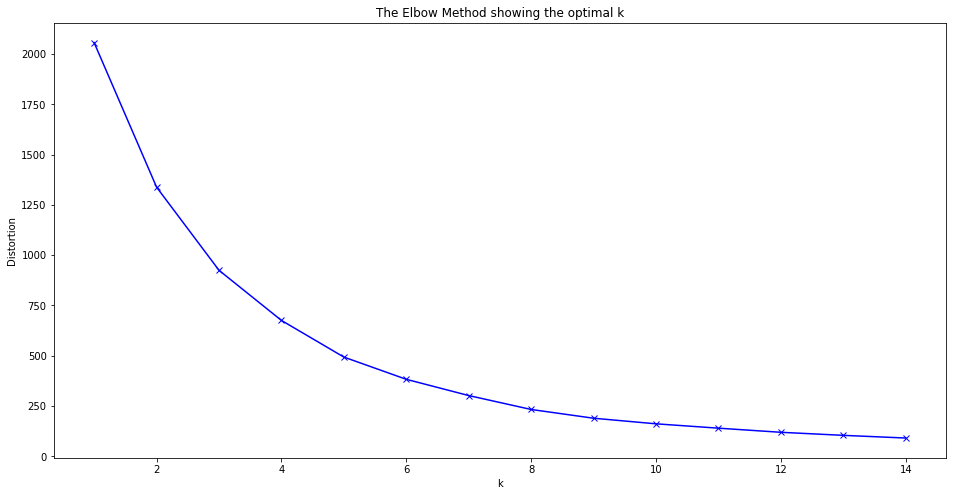

In [50]:
# Plot the graph to show at what value of k the distortion levels off
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

looking at these results - elbow is at 5
meaning 5 clusters will be used

In [52]:
el_grouped_clustering = el_grouped.drop('Neighbourhood', 1)
el_grouped_clustering.head()

,Beer Bar,Boxing Gym,Bus Station,Climbing Gym,Cocktail Bar,Coffee Shop,Dive Bar,Gas Station,Gay Bar,Gym,Gym / Fitness Center,Gym Pool,Hotel Bar,Juice Bar,Karaoke Bar,Light Rail Station,Metro Station,Park,RV Park,Sake Bar,Salon / Barbershop,Skate Park,Sports Bar,Theme Park Ride / Attraction,Train Station,Tram Station,Whisky Bar,Wine Bar
0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.0,0.000000,0.000000
1,0.076923,0.038462,0.0,0.0,0.153846,0.423077,0.0,0.000000,0.0,0.0,0.153846,0.0,0.038462,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.038462,0.0,0.000000,0.000000,0.000000,0.0,0.038462,0.038462
2,0.000000,0.000000,0.0,0.0,0.086957,0.347826,0.0,0.086957,0.0,0.0,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.173913,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.130435,0.0,0.000000,0.000000
3,0.096774,0.032258,0.0,0.0,0.129032,0.387097,0.0,0.000000,0.0,0.0,0.129032,0.0,0.000000,0.0,0.0,0.0,0.0,0.032258,0.0,0.0,0.000000,0.0,0.032258,0.032258,0.000000,0.0,0.064516,0.064516
4,0.000000,0.000000,0.0,0.0,0.000000,0.642857,0.0,0.000000,0.0,0.0,0.071429,0.0,0.000000,0.0,0.0,0.0,0.0,0.214286,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.071429,0.0,0.000000,0.000000


In [53]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(el_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 3, 0, 3, 1, 3, 3, 1, 0, 1], dtype=int32)

In [54]:
# add clustering labels

neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
el_merged = east_london

# match/merge EL London data with latitude/longitude for each neighborhood
el_merged_latlong = el_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on = 'Neighbourhood')
el_merged_latlong.head(5)

,Neighbourhood,Borough,Postcode,Post_town,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON,51.492450,0.121270,4,Train Station,Gym / Fitness Center,Wine Bar,Hotel Bar,Boxing Gym
1,Aldgate,City,EC3,LONDON,51.512000,-0.080580,3,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Beer Bar,Whisky Bar
2,Anerley,Bromley,SE20,LONDON,51.410090,-0.056830,0,Coffee Shop,Park,Gym / Fitness Center,Train Station,Cocktail Bar
3,Angel,Islington,EC1,LONDON,51.523610,-0.098770,3,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Beer Bar,Whisky Bar
4,Arkley,Barnet,EN5,"BARNET, LONDON",51.644415,-0.179185,1,Coffee Shop,Park,Train Station,Gym / Fitness Center,Wine Bar


## Results

Visualise the clusters on the map using folium - coloured keys help to determine what neighbourhoods are similar and fall into what cluster. 

In [55]:
# create map
map_clusters = folium.Map( location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(el_merged_latlong['Latitude'], el_merged_latlong['Longitude'], el_merged_latlong['Neighbourhood'], el_merged_latlong['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

#### Breakdown of each cluster 

This enables us to get a clearer view of how each cluster was formed; determine similarities and trends within the data that lead the model to create these clusters. 

In [56]:
# Cluster 0
cluster_0 = el_merged_latlong.loc[el_merged_latlong['Cluster Labels'] == 0, el_merged_latlong.columns[[1] + list(range(5, el_merged_latlong.shape[1]))]]
cluster_0.drop_duplicates()

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Bromley,-0.05683,0,Coffee Shop,Park,Gym / Fitness Center,Train Station,Cocktail Bar
16,Lewisham,0.02338,0,Coffee Shop,Park,Gym / Fitness Center,Wine Bar,Train Station
19,Tower Hamlets,-0.01264,0,Coffee Shop,Park,Gym / Fitness Center,Gym,Beer Bar
20,Tower Hamlets,-0.02594,0,Park,Coffee Shop,Gym,Gym / Fitness Center,Beer Bar
21,Lambeth,-0.09313,0,Coffee Shop,Park,Cocktail Bar,Beer Bar,Gym / Fitness Center
24,Southwark,-0.09313,0,Coffee Shop,Park,Cocktail Bar,Beer Bar,Gym / Fitness Center
30,Greenwich,0.02912,0,Coffee Shop,Park,Gym / Fitness Center,Train Station,Gas Station
32,Waltham Forest,-0.00934,0,Coffee Shop,Park,Gym,Dive Bar,Gym / Fitness Center
36,Bromley,-0.08808,0,Coffee Shop,Park,Train Station,Gym / Fitness Center,Gas Station
37,Bromley,-0.05683,0,Coffee Shop,Park,Train Station,Gym / Fitness Center,Gas Station


In [57]:
# Cluster 1
cluster_1 = el_merged_latlong.loc[el_merged_latlong['Cluster Labels'] == 1, el_merged_latlong.columns[[1] + list(range(5, el_merged_latlong.shape[1]))]]
cluster_1.drop_duplicates()

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Barnet,-0.179185,1,Coffee Shop,Park,Train Station,Gym / Fitness Center,Wine Bar
9,Newham,0.054610,1,Coffee Shop,Park,Gym / Fitness Center,Gas Station,Gym
10,Newham,0.015280,1,Coffee Shop,Park,Gym / Fitness Center,Gas Station,Gym
22,Lewisham,-0.035580,1,Coffee Shop,Park,Cocktail Bar,Gym / Fitness Center,Train Station
28,Newham,0.015280,1,Coffee Shop,Park,Gas Station,Hotel Bar,Wine Bar
43,Lewisham,-0.024670,1,Coffee Shop,Park,Cocktail Bar,Juice Bar,Gym / Fitness Center
97,Lewisham,-0.040380,1,Coffee Shop,Park,Cocktail Bar,Sake Bar,Gym / Fitness Center
135,Lambeth,-0.099280,1,Coffee Shop,Park,Gym / Fitness Center,Cocktail Bar,Wine Bar
136,Lambeth,-0.103750,1,Coffee Shop,Park,Gym / Fitness Center,Cocktail Bar,Wine Bar
139,Waltham Forest,-0.019430,1,Coffee Shop,Gym / Fitness Center,Park,Climbing Gym,Gas Station


In [58]:
# Cluster 2
cluster_2 = el_merged_latlong.loc[el_merged_latlong['Cluster Labels'] == 2, el_merged_latlong.columns[[1] + list(range(5, el_merged_latlong.shape[1]))]]
cluster_2.drop_duplicates()

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,Lewisham,-0.01868,2,Park,Coffee Shop,Train Station,Gas Station,Cocktail Bar
17,Greenwich,0.02338,2,Park,Coffee Shop,Gym / Fitness Center,Train Station,Gym
18,Greenwich,0.01350,2,Park,Coffee Shop,Gym / Fitness Center,Train Station,Gym
27,Waltham Forest,0.02723,2,Park,Coffee Shop,Wine Bar,Hotel Bar,Boxing Gym
31,Lewisham,0.01350,2,Park,Gym / Fitness Center,Train Station,Coffee Shop,Gym
50,Greenwich,0.05212,2,Park,Train Station,Coffee Shop,Gym,Gym / Fitness Center
51,"Bexley, Greenwich",0.05212,2,Park,Train Station,Coffee Shop,Gym,Gym / Fitness Center
58,Greenwich,0.00275,2,Park,Wine Bar,Coffee Shop,Juice Bar,Theme Park Ride / Attraction
69,Lewisham,-0.00754,2,Park,Coffee Shop,Gym,Gym / Fitness Center,Wine Bar
72,"Greenwich, Lewisham",0.01350,2,Park,Gym / Fitness Center,Train Station,Coffee Shop,Gym


In [59]:
# Cluster 3
cluster_3 = el_merged_latlong.loc[el_merged_latlong['Cluster Labels'] == 3, el_merged_latlong.columns[[1] + list(range(5, el_merged_latlong.shape[1]))]]
cluster_3.drop_duplicates()

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,City,-0.08058,3,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Beer Bar,Whisky Bar
3,Islington,-0.09877,3,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Beer Bar,Whisky Bar
5,Southwark,-0.09613,3,Coffee Shop,Cocktail Bar,Wine Bar,Gym / Fitness Center,Skate Park
6,City,-0.09877,3,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Beer Bar,Whisky Bar
13,Tower Hamlets,-0.06257,3,Coffee Shop,Wine Bar,Cocktail Bar,Beer Bar,Salon / Barbershop
15,City,-0.10434,3,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Beer Bar,Park
41,Hackney,-0.05532,3,Coffee Shop,Cocktail Bar,Wine Bar,Park,Gym / Fitness Center
52,Islington & City,-0.09877,3,Coffee Shop,Cocktail Bar,Gym / Fitness Center,Beer Bar,Whisky Bar
60,Hackney,-0.05323,3,Coffee Shop,Cocktail Bar,Park,Wine Bar,Beer Bar
61,Hackney,-0.05532,3,Coffee Shop,Cocktail Bar,Park,Wine Bar,Beer Bar


In [60]:
# Cluster 4
cluster_4 = el_merged_latlong.loc[el_merged_latlong['Cluster Labels'] == 4, el_merged_latlong.columns[[1] + list(range(5, el_merged_latlong.shape[1]))]]
cluster_4.drop_duplicates()

,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Bexley, Greenwich",0.12127,4,Train Station,Gym / Fitness Center,Wine Bar,Hotel Bar,Boxing Gym
14,Bexley,0.12127,4,Train Station,Gym / Fitness Center,Wine Bar,Hotel Bar,Boxing Gym
132,"Bexley, Greenwich",0.12013,4,Train Station,Gym / Fitness Center,Coffee Shop,Wine Bar,Hotel Bar
133,"Bexley, Greenwich",0.12127,4,Train Station,Gym / Fitness Center,Coffee Shop,Wine Bar,Hotel Bar


## Discussion

Looking at the individual clusters, the data sets are very similar, however it is the order and frequency that plays a big role in deciding which clusters are better suited to BrightMindsDS criteria. 
Which were as follows:

- Can it be accessed via local transport?
- Are there any gyms nearby?
- Is there a nice park/open space near by?
- Are there good coffee shops nearby for lunch?
- Are there good bars/nightclubs to socialise in after work?

BrightMindsDS wanted their chosen location to fulfil at least 2 requirements, exploring each cluster it can be seen that all do this. Which asks the question, what was the point? Well this is where our use of the Foursquare API data played a big role, enabling us to see what venues are the most popular/common in that area.

##### Cluster 0
- This cluster is definitely one of the largest, made up of nearly 20 neighbourhoods. This offers BrightMindsDS a variety of locations spread out over the East of London. 
These neighbourhoods have coffee shops and parks listed as the most common venues. Offering many locations to socialise outside of work. This was seen as a great positive for the company as stated in a recent article 'The beauty of a work café, is that it can be treated as both an area for relaxation and a place of engagement and innovation.' (1) This was one of the highest priorities for BrightMindsDS; generating innovation and offering a place to relax and take a break. The 3rd, 4th and 5th most common venues are made up of a variety of bars, gyms and most importantly transport stations. Bus, train, metro and Gas stations are common in these neighbourhoods. Travel in and around London will be essential for a rising company. Also to note, hotel bars and gay bars are listed too; suggesting inclusive cultures and possible venues for clients to stay.

***Based on these factors Neighbourhoods in cluster 2 meet and go beyond BrightMindsDS expectations.*** 

##### Cluster 1
- Within these neighbourhoods, coffee shops and parks were the most popular venues. Suggesting good locations to socialise outside of work. This was seen as a great positive for the company (explained above). However there is very little mention of any local transportation. The realism of working in a big city like London is that employees will need to travel around the city to meet clients and/or commute. This means the neighbourhoods in cluster 1 will have to be ignored.

##### Cluster 2
Looking at the data for cluster 2 I can see that:

- Park is most common, good space to take a break, promote some outdoor team activities or working

- Train station is also listed as one of the most common venues suggesting good rail and underground links which is great for commuters or when visiting clients.  

- Gym, boxing gym and gym pool mentioned, providing a different experience aside from a weights or cardio gym.

- There are variety of bars on offer too.

***Based on these factors Neighbourhoods in cluster 2 meet and go beyond BrightMindsDS expectations.*** 

##### Cluster 3
- Very similar to neighbourhoods in cluster 1; coffee shops and bars are very common, skate parks and fitness centers offer great facilities for BrightMindsDS employees to stay active. Promoting an active lifestyle and a good work-life balance. However there is no mention of a bus or train station in the vacinity. As mentioned previously, city links and having the option to travel easily is essential to building a steady business. This requirement is a must so these neighbourhoods should be ignored. 

##### Cluster 4
- These 2 neighbourhoods offer good transport links and quite an active location with a gym considered to be the 2nd most common venue. Again, seeing hotel bars suggests that clients can have a place to stay near the office which is a great feature. However there is no data to suggest that a park or open space can be found within the radius of that location. This limits outdoor activities and could inhibit creativity, meaning neighbourhoods in cluster 4 should not be considered. 



(1) https://www.blueprintinteriors.com/office-work-cafe/


## Conclusion

**Looking at these results I would recommend any Neighbourhood classed in cluster 0 or cluster 2.**

Both fulfil all requirements set out by BrightMindsDS; offering open spaces for employees to relax, recuperate and socialise as a team, have a variety of bars and gyms to escape to if work gets busy. As the company builds and secures more clients, more and more relationships will need to be made, stress may build up and long hours will need to be worked. Providing their employees with a nice office space in an ideal location is essential to improve employee morale and creativity. 
Making sure they are situated in an up and coming location will reflect well to potential clients and employees alike. 

Further evaluation could have explored office space prices based on location, or reviews of the venues nearby. Foursquare provides so much data it has been very interesting to explore. 